In [1]:
import numpy as np
import pandas as pd
import os
import urllib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

In [6]:
if not os.path.isfile('reviews2.pkl'):
    urllib.request.urlretrieve('https://www.dropbox.com/s/15tfttuzqe7fimg/reviews2.pkl?dl=1','reviews.pkl')
    
df = pd.read_pickle('reviews2.pkl')    

In [7]:
df.head()

,Reviews,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [8]:
df.tail()

,Reviews,Sentiment
12495,"Towards the end of the movie, I felt it was to...",0
12496,This is the kind of movie that my enemies cont...,0
12497,I saw 'Descent' last night at the Stockholm Fi...,0
12498,Some films that you pick up for a pound turn o...,0
12499,"This is one of the dumbest films, I've ever se...",0


In [9]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(df.Reviews.values)

In [10]:
tf_vectorizer.get_feature_names()

[u'00',
 u'000',
 u'0000000000001',
 u'00001',
 u'00015',
 u'000s',
 u'001',
 u'003830',
 u'006',
 u'007',
 u'0079',
 u'0080',
 u'0083',
 u'0093638',
 u'00am',
 u'00pm',
 u'00s',
 u'01',
 u'01pm',
 u'02',
 u'020410',
 u'029',
 u'03',
 u'04',
 u'041',
 u'05',
 u'050',
 u'06',
 u'06th',
 u'07',
 u'08',
 u'087',
 u'089',
 u'08th',
 u'09',
 u'0f',
 u'0ne',
 u'0r',
 u'0s',
 u'10',
 u'100',
 u'1000',
 u'1000000',
 u'10000000000000',
 u'1000lb',
 u'1000s',
 u'1001',
 u'100b',
 u'100k',
 u'100m',
 u'100min',
 u'100mph',
 u'100s',
 u'100th',
 u'100x',
 u'100yards',
 u'101',
 u'101st',
 u'102',
 u'102nd',
 u'103',
 u'104',
 u'1040',
 u'1040a',
 u'1040s',
 u'105',
 u'1050',
 u'105lbs',
 u'106',
 u'106min',
 u'107',
 u'108',
 u'109',
 u'10am',
 u'10lines',
 u'10mil',
 u'10min',
 u'10minutes',
 u'10p',
 u'10pm',
 u'10s',
 u'10star',
 u'10th',
 u'10x',
 u'10yr',
 u'11',
 u'110',
 u'1100',
 u'11001001',
 u'1100ad',
 u'111',
 u'112',
 u'1138',
 u'114',
 u'1146',
 u'115',
 u'116',
 u'117',
 u'11f',
 u'

In [11]:
len(tf_vectorizer.get_feature_names())

74849

In [14]:
tf_vectorizer = CountVectorizer(min_df=5,stop_words='english')
tf = tf_vectorizer.fit_transform(df.Reviews.values)
len(tf_vectorizer.get_feature_names())

26967

In [15]:
tf.shape

(25000, 26967)

In [16]:
tf[0].sum()

61

In [17]:
idx = np.random.permutation(len(df))
x_train = tf[idx][:12500].todense()
x_test = tf[idx][12500:].todense()
y_train = df.Sentiment.values[idx][:12500]
y_test = df.Sentiment.values[idx][12500:]

# Keras Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(output_dim=100, input_dim=tf.shape[1]))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=["binary_accuracy"])

In [20]:
model.fit(x_train, y_train, nb_epoch=2, batch_size=128)

Epoch 1/2
12500/12500 [==============================] - 92s - loss: 0.3612 - binary_accuracy: 0.8511      

In [64]:
y_test_pred = model.predict(x_test)

In [65]:
y_test_pred

array([[ 0.00067707],
       [ 0.64152622],
       [ 0.53659147],
       ..., 
       [ 0.61255676],
       [ 0.55383879],
       [ 0.11499805]], dtype=float32)

In [73]:
y_test_pred[y_test_pred<0.5] = 0
y_test_pred[y_test_pred>=0.5] = 1
np.count_nonzero(y_test_pred==y_test[:,None])/len(y_test)

0.88256

In [77]:
test_case = tf_vectorizer.transform(["I really hated this movie"])
model.predict(test_case.todense())

array([[ 0.44179022]], dtype=float32)

In [78]:
test_case = tf_vectorizer.transform(["I really loved this movie"])
model.predict(test_case.todense())

array([[ 0.67893624]], dtype=float32)

### Improving the model

In [107]:
tfidf_vectorizer = TfidfVectorizer(min_df=5,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df.Reviews.values)
len(tf_vectorizer.get_feature_names())

26967

In [110]:
np.sum(np.square(tfidf[0].todense()))

0.99999999999999967

In [111]:
x_train = tfidf[idx][:12500].todense()
x_test = tfidf[idx][12500:].todense()

In [113]:
model.fit(x_train, y_train, nb_epoch=2, batch_size=128)

Epoch 1/2
12500/12500 [==============================] - 6s - loss: 0.4059 - binary_accuracy: 0.8463     
Epoch 2/2
12500/12500 [==============================] - 5s - loss: 0.1833 - binary_accuracy: 0.9514     


In [114]:
y_test_pred = model.predict(x_test)
y_test_pred[y_test_pred<0.5] = 0
y_test_pred[y_test_pred>=0.5] = 1
np.count_nonzero(y_test_pred==y_test[:,None])/len(y_test)

0.89096

In [115]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_33 (Dense)                 (None, 100)           2696800     dense_input_13[0][0]             
____________________________________________________________________________________________________
activation_33 (Activation)       (None, 100)           0           dense_33[0][0]                   
____________________________________________________________________________________________________
dense_34 (Dense)                 (None, 1)             101         activation_33[0][0]              
____________________________________________________________________________________________________
activation_34 (Activation)       (None, 1)             0           dense_34[0][0]                   
Total params: 2696901
_____________________________________________________________________

In [125]:
pltmodel.get_weights()[0]

array([[ 0.00944713, -0.00318688, -0.00809623, ...,  0.00335867,
        -0.00414377,  0.01001332],
       [ 0.02583803, -0.00786942, -0.01591542, ..., -0.00999653,
         0.02924347,  0.01099609],
       [ 0.00299458,  0.00576433,  0.00566012, ..., -0.00628537,
        -0.00794614, -0.00132258],
       ..., 
       [-0.01323314, -0.01323581,  0.00086141, ...,  0.01116477,
         0.00523074, -0.01231245],
       [ 0.01537368, -0.01984742, -0.02385677, ..., -0.01462397,
         0.00823438,  0.01410121],
       [-0.03280822,  0.0276644 ,  0.01736589, ...,  0.03323051,
        -0.04212286, -0.02399497]], dtype=float32)

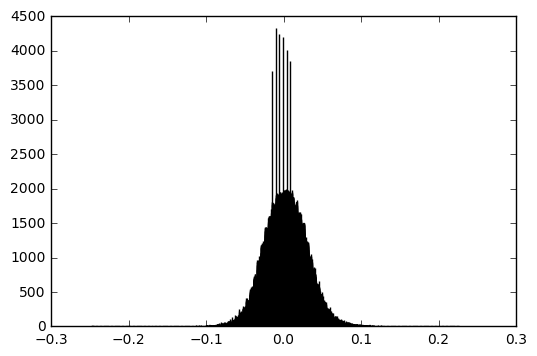

In [128]:
plt.hist(model.get_weights()[0],100)
plt.show()